### Guided Practice: Logit Function and Odds

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

### Teaching Notes

Note this is just one approach optimized for Area Under the Curve.

Age will need some work (since it is missing for a significant portion), and other data cleanup simplifies the data problem a little.

In [14]:
import pandas as pd
%matplotlib inline


In [15]:
titanic = pd.read_csv('titanic.csv')

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic.set_index('PassengerId', inplace=True)
titanic['is_male'] = titanic.Sex.apply(lambda x: 1 if x == 'male' else 0)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

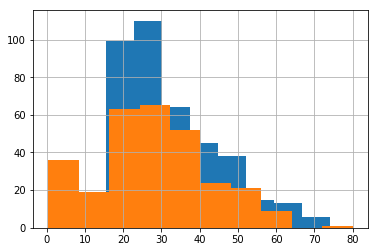

In [18]:
titanic.groupby('Survived').Age.hist()

In [19]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male
PassengerId,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1


In [20]:
titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)

In [21]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression

feature_set = titanic[['is_male', 1, 2, 'Fare', 'Age', 'had_parents', 'had_siblings']]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(titanic), n_folds=10),
    scoring='roc_auc'
)


gs.fit(feature_set, titanic.Survived)
gs.grid_scores_
#print gs.best_estimator_

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


KeyError: '[1 2] not in index'

In [ ]:
print gs.best_estimator_